# Tutorial for Mathematical Morphology

This file is meant to demonstrate the use of gstlearn for Morphological Operations

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt

Setting some global variables

In [2]:
# Set the Global Options
verbose = True
flagGraphic = True

# Define the Space Dimension
ndim = 2
gl.defineDefaultSpace(gl.ESpaceType.RN, ndim)

# Set the Seed for the Random Number generator
gl.law_set_random_seed(5584)

In [3]:
nx = ny = 100
nxy = [nx,ny]
ntotal = nx * ny
dx = dy = 0.01

In several usages, we will need a VectorDouble dimensionned to the total number of pixels. This is created next.

In [4]:
localVD = gl.VectorDouble(ntotal)

Generating an initial square grid covering a 1 by 1 surface (100 meshes along each direction).


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      0.010     0.010
Number :        100       100

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu - Locator = z1
 

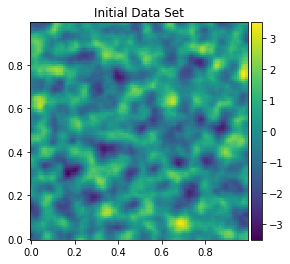

In [5]:
grid = gl.DbGrid.create(nxy, [dx,dy])
model = gl.Model.createFromParam(gl.ECov.CUBIC, 0.1, 1.)
gl.simtub(None, grid, model)
if verbose:
    grid.display()
if flagGraphic:
    ax = gp.grid(grid,title="Initial Data Set",aspect=1)

## Basic operations

We retreive the newly simulated variable (called *Simu*) from the *grid* Db into a local Vector (called *tab*). This vector is then transformed by thresholding and loaded into an image object (called *image*). This object is very efficient as each pixel is stored into a single *bit*. A second Image object (called *image2*) is created and will be used in subsequent diadic operations.

In [6]:
vmin = -1
vmax = +1
image2 = gl.BImage(nxy)
tab = grid.getColumn("Simu")
image = gl.morpho_double2image(nxy,tab,vmin,vmax)

In [7]:
volume = gl.morpho_count(image)
print("Grain Volume =",volume, " /",ntotal,"(pixels)\n")

Grain Volume = 6920  / 10000 (pixels)



For visualization (and i the current version), we must first convert the image into a vector and load it into a grid.

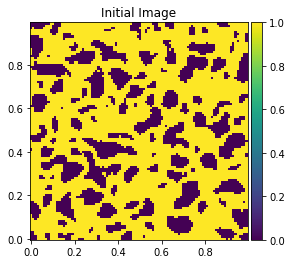

In [8]:
if flagGraphic:
    gl.morpho_image2double(image, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Initial Image",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

The next step interchanges grain and pore

In [9]:
gl.morpho_negation(image, image2)

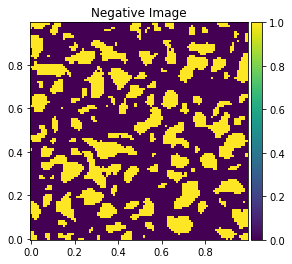

In [10]:
if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Negative Image",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

## Basic Mophological Image transformations

We start with the initial image and perform an erosion. The second argument defines the type of structuring element: either Cross (0) or Block (1)

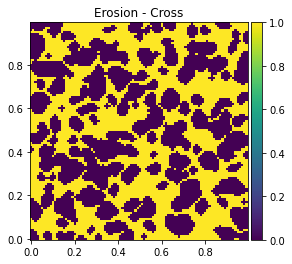

In [11]:
gl.morpho_erosion(0, [1,1], image, image2)

if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Erosion - Cross",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

We check the result of ersosion when choosing the Block structuring element

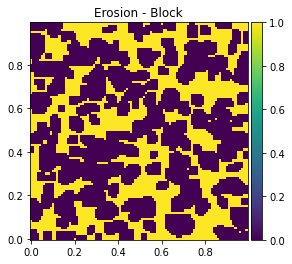

In [12]:
gl.morpho_erosion(1, [1,1], image, image2)

if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Erosion - Block",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

We now perform the dilation of the Initial image (only the Cross structuring element will be used in the next paragraphs)

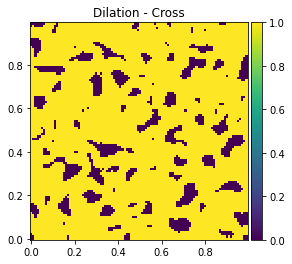

In [13]:
gl.morpho_dilation(0, [1,1], image, image2)

if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Dilation - Cross",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

Combining the elementary operations (Erosion and Dilation), we can perform directly an opening

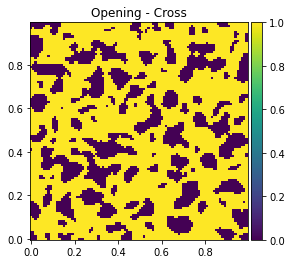

In [14]:
gl.morpho_opening(0, [1,1], image, image2)

if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Opening - Cross",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

And the closing

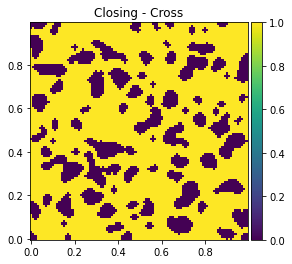

In [15]:
gl.morpho_closing(0, [1,1], image, image2)

if flagGraphic:
    gl.morpho_image2double(image2, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Closing - Cross",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

## Connected components

Starting from the Initial image, we now wish to determine the connected components

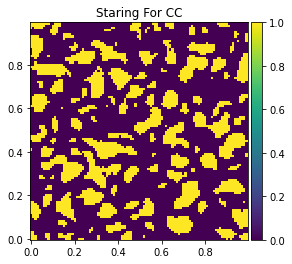

In [16]:
gl.morpho_negation(image, image)

if flagGraphic:
    gl.morpho_image2double(image, 0, 1., 0., localVD)
    iuid = grid.addColumns(localVD,"Staring For CC",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

Number of connected components = 118 



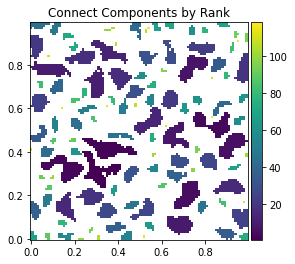

In [17]:
localVD = gl.morpho_labelling(0, 0, image, np.nan)
print("Number of connected components =", localVD.size(),"\n")

if flagGraphic:
    iuid = grid.addColumns(localVD,"Connect Components by Rank",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

Number of connected components = 118 



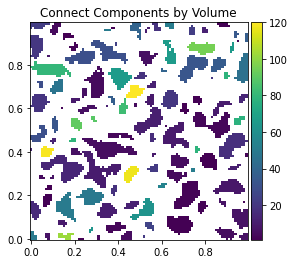

In [18]:
localVD = gl.morpho_labelling(0, 1, image, np.nan, localVD)
print("Number of connected components =", localVD.size(),"\n")

if flagGraphic:
    iuid = grid.addColumns(localVD,"Connect Components by Volume",gl.ELoc.Z)
    ax = gp.grid(grid,aspect=1)

## Some shortcuts

The procedure is made easier for basic morphological operations, using directly the method *morpho*. This method operates from a variable stored in a Db (organized as a Grid) and returns the result in the same Db.

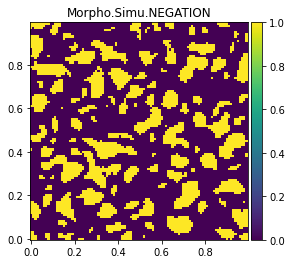

In [19]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.NEGATION,-1.,1.)

if flagGraphic:
    ax = gp.grid(grid,aspect=1)

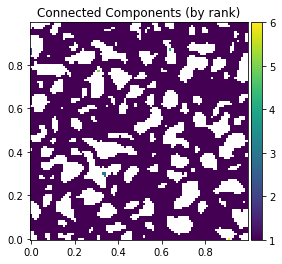

In [20]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.CC,-1.,1.,verbose=False)

if flagGraphic:
    ax = gp.grid(grid,title="Connected Components (by rank)",aspect=1)

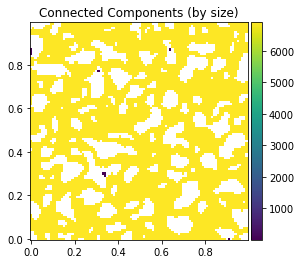

In [21]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.CCSIZE,-1.,1.,verbose=False)

if flagGraphic:
    ax = gp.grid(grid,title="Connected Components (by size)",aspect=1)

Calculation of distance to the edge of the grain

In [22]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.DISTANCE,radius=[1,1],verbose=False)

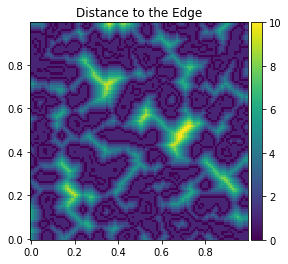

In [23]:
if flagGraphic:
    ax = gp.grid(grid,name="*DISTANCE",title="Distance to the Edge",aspect=1)

Calculation of the 2-D angle of the gradient

In [24]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.ANGLE,radius=[1,1],verbose=False)

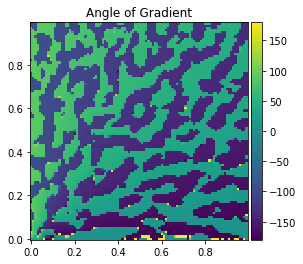

In [25]:
if flagGraphic:
    ax = gp.grid(grid,name="*ANGLE",title="Angle of Gradient",aspect=1)

Calculation of Gradient components

In [26]:
grid.setLocator("Simu",gl.ELoc.Z)
dum = grid.morpho(gl.EMorpho.GRADIENT)

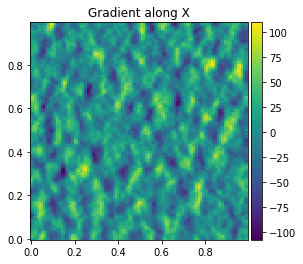

In [27]:
if flagGraphic:
    ax = gp.grid(grid,name="*GRADIENT.1",title="Gradient along X",aspect=1)

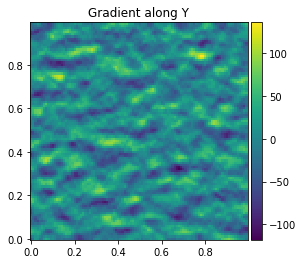

In [28]:
if flagGraphic:
    ax = gp.grid(grid,name="*GRADIENT.2",title="Gradient along Y",aspect=1)

Smoothing the input image

In [29]:
grid.setLocator("Simu",gl.ELoc.Z,0,True)
neighI = gl.NeighImage([3,3])
dum = grid.smooth(neighI)

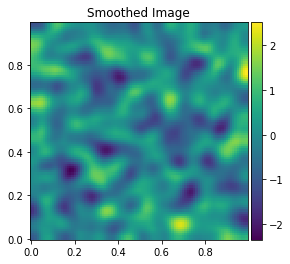

In [30]:
if flagGraphic:
    ax = gp.grid(grid,name="Smooth*",title="Smoothed Image",aspect=1)

## Testing the Bitmap Image printout

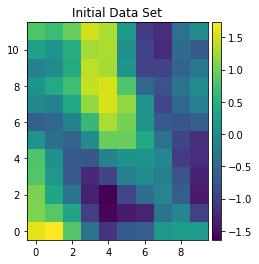

In [31]:
nx = 10
ny = 12
nxy = [nx,ny]
localVD = gl.VectorDouble(nx * ny)
grid = gl.DbGrid.create(nxy)
model = gl.Model.createFromParam(gl.ECov.CUBIC, 6, 1.)
gl.simtub(None, grid, model)
if flagGraphic:
    ax = gp.grid(grid,title="Initial Data Set",aspect=1)

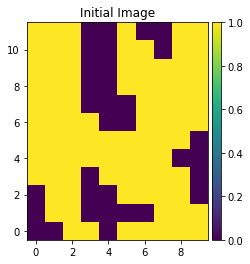

In [32]:
vmin = -1
vmax = +1
image2 = gl.BImage(nxy)
tab = grid.getColumn("Simu")
image = gl.morpho_double2image(nxy,tab,vmin,vmax)

gl.morpho_image2double(image, 0, 1., 0., localVD)
iuid = grid.addColumns(localVD,"Initial Image",gl.ELoc.Z)
ax = gp.grid(grid,aspect=1)

In [33]:
image

Array dimension = 2
- Dimension #1 : 10
- Dimension #2 : 12

  1234567890
1 1110010011
2 1110011011
3 1110011111
4 1110011111
5 1110001111
6 1111001111
7 1111111110
8 1111111100
9 1110111110
0 0110011110
1 0110000111
2 0011011111

In [34]:
bstrfmt = gl.BImageStringFormat('+','.',[2,3])
image.display(bstrfmt)

Array dimension = 2
- Dimension #1 : 10
- Dimension #2 : 12

  34567890
4 .++.....
5 .+++....
6 ..++....
7 .......+
8 ......++
9 .+.....+
0 .++....+
1 .++++...
2 ..+.....
 